<h3>EDA</h3>

In [353]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns


In [354]:
df = pd.read_csv('milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


"pH" = pH value, type: float <br>
"Temprature" = Temperature, type: Int<br>
"Taste" = Taste, type: Binary<br>
"Odor" = Odor, type: Binary<br>
"Fat " = Fat in milk, type: Binary<br>
"Turbidity" = Clarity of milk, type: Binary<br>
"Color" = color of milk, type: Int, explanation: for example if color = 253, it means rgba(252,252,252,1) format<br>
"Grade" = Quality, type: Categorical<br>

In [355]:
df.shape

(1059, 8)

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [357]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [358]:
df['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

In [392]:
df = df.rename({'Temprature':'Temperature'},axis=1)
df = df.rename({'Fat ':'Fat'},axis=1)

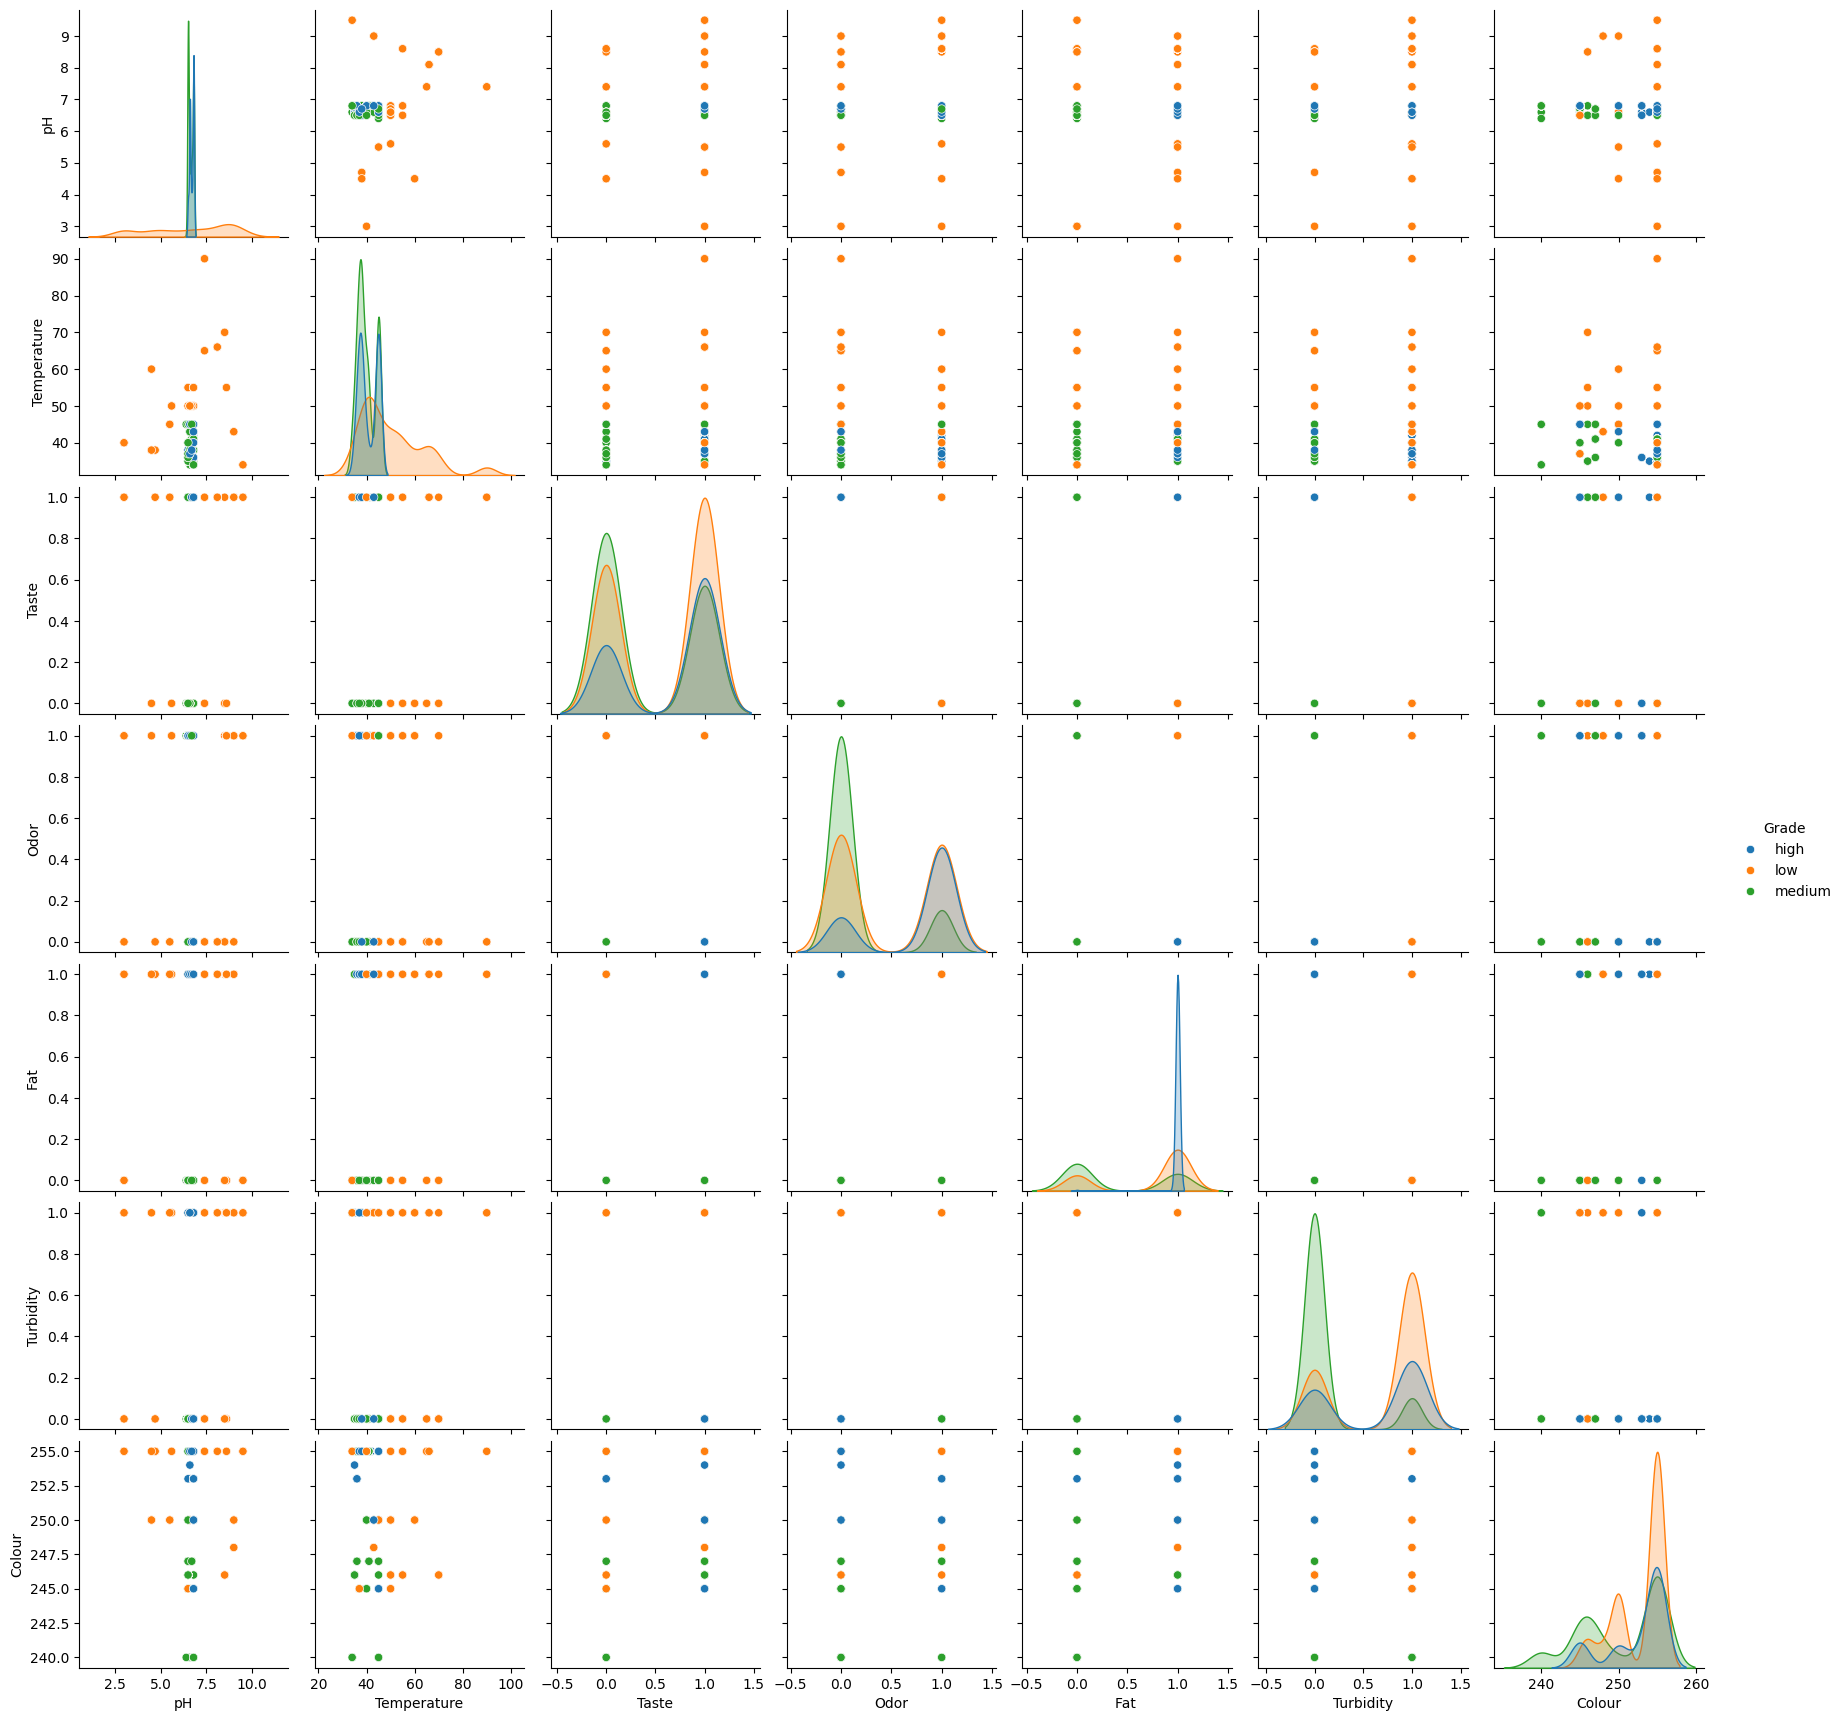

In [360]:
sns.pairplot(df,hue='Grade')

In [393]:
df.columns

Index(['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

<Axes: xlabel='Temperature', ylabel='pH'>

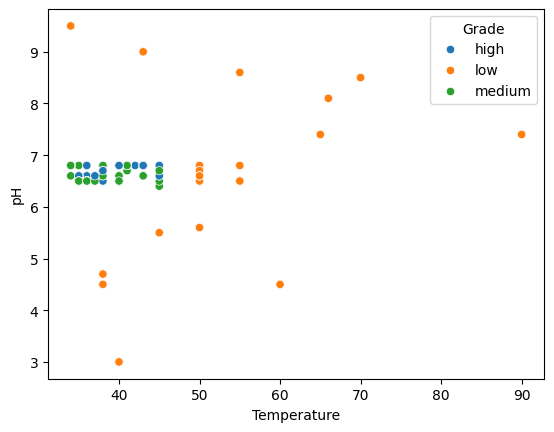

In [395]:
sns.scatterplot(data=df,x='Temperature',y='pH',hue='Grade')

<h3>Train Test Split</h3>

In [361]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [362]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
505,6.6,38,0,0,0,0,255
928,6.6,45,0,0,0,1,250
650,6.8,45,0,1,0,0,240
626,6.5,40,1,0,0,0,250
443,6.8,45,1,1,1,1,245
...,...,...,...,...,...,...,...
1033,6.6,38,0,0,0,0,255
763,5.6,50,0,1,1,1,255
835,4.7,38,1,0,1,0,255
559,9.0,43,1,0,1,1,250


In [363]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

<h3>Logistic Regression Model</h3>

In [364]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
lo.fit(x_train,y_train)

LogisticRegression()

In [365]:
lo_y_pred = lo.predict(x_test)

In [366]:
lo.predict(sc.transform([[6.6,38,0,0,0,0,255]]))

c:\Users\Aditya bhoir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['medium'], dtype=object)

In [ ]:
y_pred = lo_y_pred.squeeze()
x_test_view = x_test[input_labels].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()

In [367]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lo_ac = accuracy_score(y_test,lo_y_pred)
print(f'Accuracy score: {lo_ac}')

Accuracy score: 0.7122641509433962


In [368]:
print(classification_report(lo_y_pred,y_test))

              precision    recall  f1-score   support

        high       0.39      0.72      0.51        36
         low       0.83      0.66      0.74        86
      medium       0.88      0.76      0.81        90

    accuracy                           0.71       212
   macro avg       0.70      0.71      0.69       212
weighted avg       0.78      0.71      0.73       212



In [369]:
cm = confusion_matrix(y_test,lo_y_pred)
cm

array([[26, 25, 15],
       [ 5, 57,  7],
       [ 5,  4, 68]], dtype=int64)

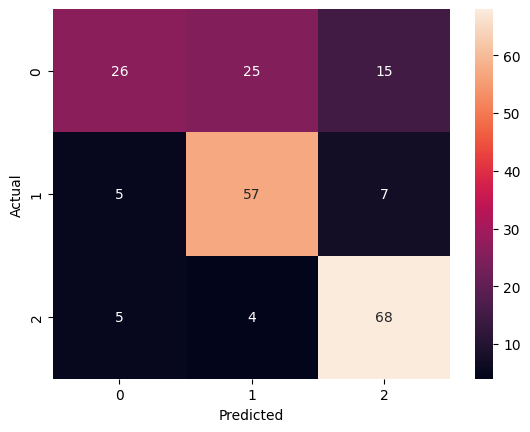

In [370]:
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h3>Decision Tree Model</h3>

In [371]:
parameter = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

In [372]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=0)
cv = GridSearchCV(dtc,parameter,scoring='accuracy',cv=5)
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [373]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'random'}

In [374]:
dtc_pred = cv.predict(x_test)

In [375]:
dtc_acc = accuracy_score(y_test,dtc_pred)
print(f'Accuracy score: {dtc_acc}')

Accuracy score: 0.9339622641509434


In [376]:
best_estim = cv.best_estimator_

[Text(0.609375, 0.95, 'x[1] <= 0.115\ngini = 0.646\nsamples = 847\nvalue = [190, 360, 297]'),
 Text(0.546875, 0.85, 'x[5] <= 0.834\ngini = 0.649\nsamples = 673\nvalue = [190, 186, 297]'),
 Text(0.28125, 0.75, 'x[0] <= -0.458\ngini = 0.451\nsamples = 369\nvalue = [74, 34, 261]'),
 Text(0.21875, 0.65, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.34375, 0.65, 'x[4] <= -0.684\ngini = 0.344\nsamples = 335\nvalue = [74, 0, 261]'),
 Text(0.28125, 0.55, 'gini = 0.0\nsamples = 153\nvalue = [0, 0, 153]'),
 Text(0.40625, 0.55, 'x[3] <= -0.1\ngini = 0.483\nsamples = 182\nvalue = [74, 0, 108]'),
 Text(0.1875, 0.45, 'x[0] <= -0.075\ngini = 0.419\nsamples = 134\nvalue = [40, 0, 94]'),
 Text(0.125, 0.35, 'gini = 0.0\nsamples = 52\nvalue = [0, 0, 52]'),
 Text(0.25, 0.35, 'x[0] <= 0.094\ngini = 0.5\nsamples = 82\nvalue = [40, 0, 42]'),
 Text(0.125, 0.25, 'x[2] <= 0.482\ngini = 0.176\nsamples = 41\nvalue = [37, 0, 4]'),
 Text(0.0625, 0.15, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(

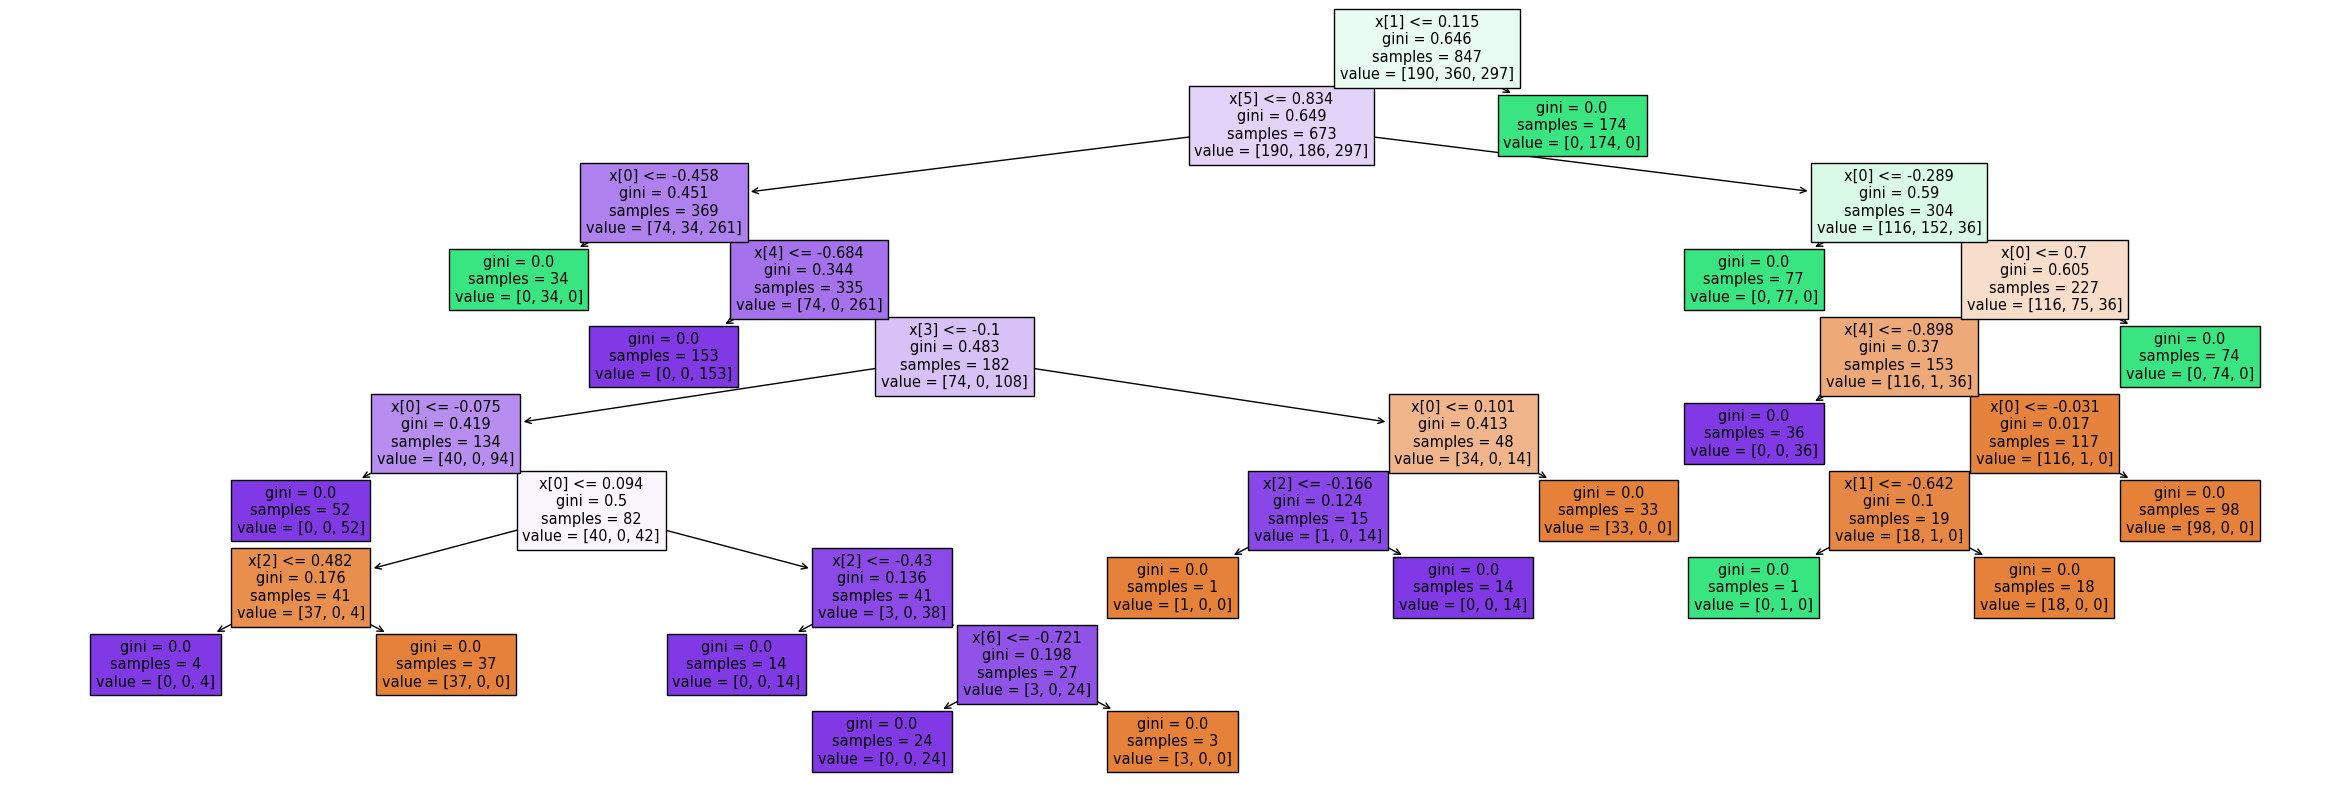

In [377]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(best_estim,filled=True)

In [378]:
print(classification_report(dtc_pred,y_test))

              precision    recall  f1-score   support

        high       0.80      1.00      0.89        53
         low       0.99      0.85      0.91        80
      medium       1.00      0.97      0.99        79

    accuracy                           0.93       212
   macro avg       0.93      0.94      0.93       212
weighted avg       0.95      0.93      0.93       212

